In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math



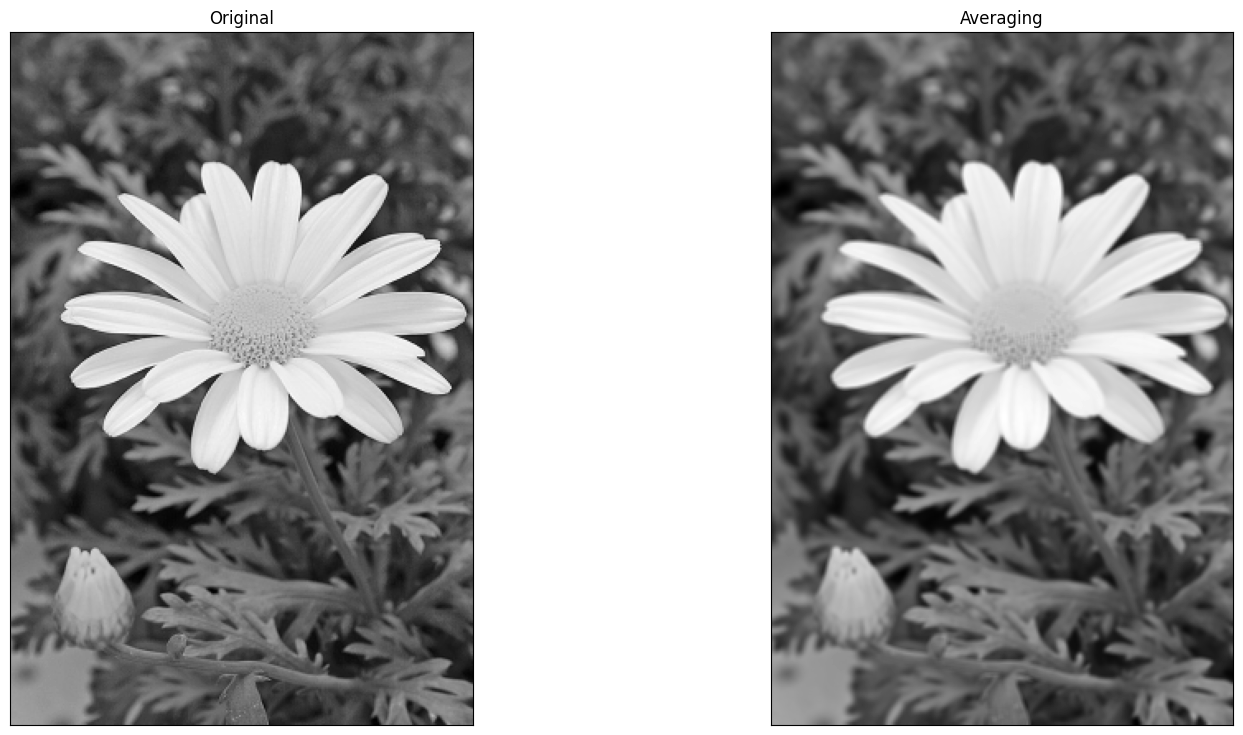

In [5]:
im = cv.imread('a1images/daisy.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

kernel = np.ones((3,3),np.float32)/9
imavg = cv.filter2D(im, cv.CV_32F, kernel)

# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imavg, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Rashane\AppData\Local\Temp\ipykernel_11368\2006465540.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


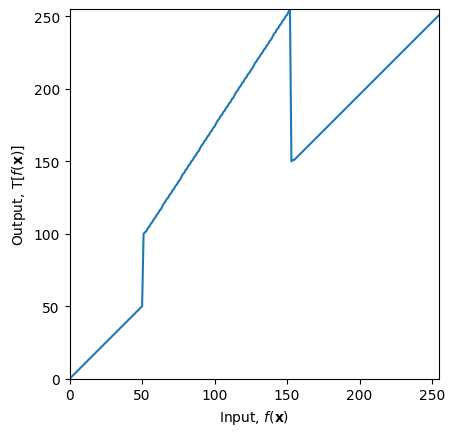

In [ ]:
p = np.array([(0,0),(50,50),(50,100),(150,255),(150,150),(255,255)])

line_1 = np.linspace(p[0,1] ,p[1,1],p[1,0]+1-0)
line_2 = np.array([p[2][1]], dtype='uint8')
line_3 = np.linspace(p[2,1]+1 ,p[3,1],p[3,0]+1-p[2,0])
line_4 = np.array([p[4][1]], dtype='uint8')
line_5 = np.linspace(p[4,1]+1 ,p[5,1],p[5,0]+1-p[4,0])

transform_1 = np.concatenate((line_1,line_2,line_3,line_4,line_5), axis=0).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform_1)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Rashane\AppData\Local\Temp\ipykernel_13032\4188186408.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


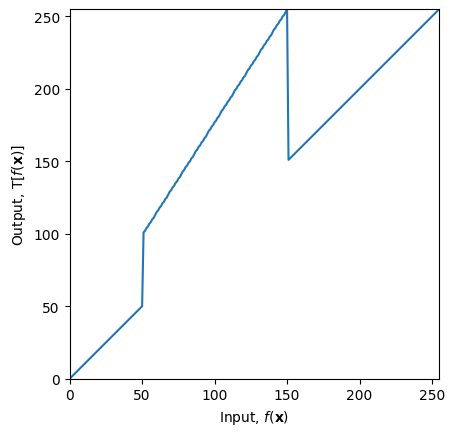

In [2]:
p = np.array([(0,0),(50,50),(50,100),(150,255),(150,150),(255,255)])

line_1 = np.linspace(p[0,1] ,p[1,1],p[1,0]+1-0).astype('uint8')
line_2 = np.linspace(p[1,1] ,p[2,1],p[2,0]-p[1,0]).astype('uint8')
line_3 = np.linspace(p[2,1]+1 ,p[3,1],p[3,0]-p[2,0]).astype('uint8')
line_4 = np.linspace(p[3,1]+1 ,p[4,1],p[4,0]-p[3,0]).astype('uint8')
line_5 = np.linspace(p[4,1]+1 ,p[5,1],p[5,0]-p[4,0]).astype('uint8')

transform = np.concatenate((line_1,line_2,line_3,line_4,line_5), axis=0).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


In [10]:
img = cv.imread('a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
img_transform = cv.LUT(img, transform)

cv.imshow("Transformed Image", img_transform)

cv.waitKey(0)   
cv.destroyAllWindows()

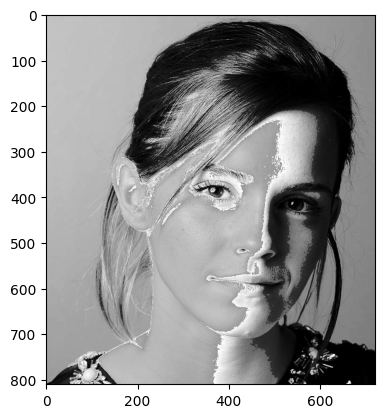

In [11]:
plt.imshow(img_transform, cmap='gray')

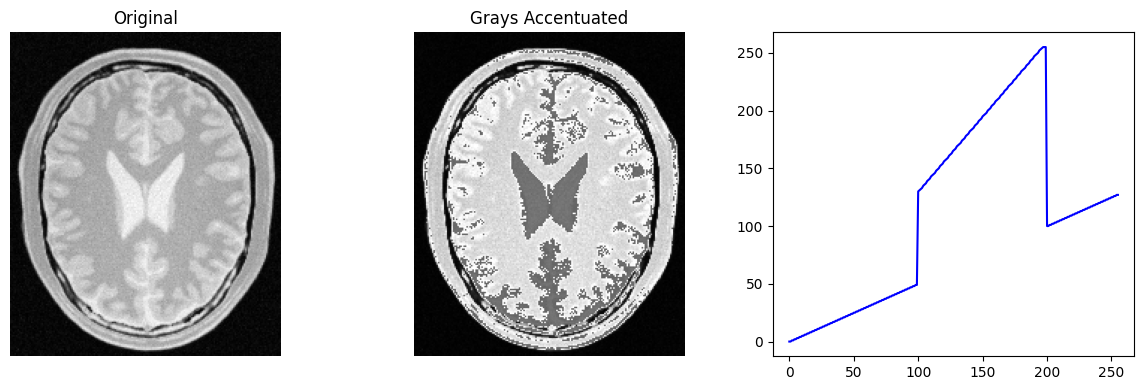

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load your image in grayscale
img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Build the transformation table
transform_gray = np.zeros(256, dtype=np.uint8)
for p in range(256):
    if p < 100:       # Dark remains dark
        transform_gray[p] = p*0.5
    elif p < 200:     # Gray boosted
        transform_gray[p] = min(255, int(p * 1.3))
    else:             # White strongly boosted
        transform_gray[p] = p*0.5


transform_white = np.zeros(256, dtype=np.uint8)
for p in range(256):
    if p < 100:       # Dark remains dark
        transform_white[p] = p*0.5
    elif p < 200:     # Gray boosted
        transform_white[p] = p*0.5
    else:             # White strongly boosted
        transform_white[p] = min(255, int(p * 1.3))
# Apply the transformation to the image

img_transform = cv.LUT(img, transform_gray)
plt.figure(figsize=(12,4))

# Display using matplotlib
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_transform, cmap='gray')
plt.title("Grays Accentuated")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(range(256), transform_gray, color='blue')
plt.tight_layout()
plt.show()


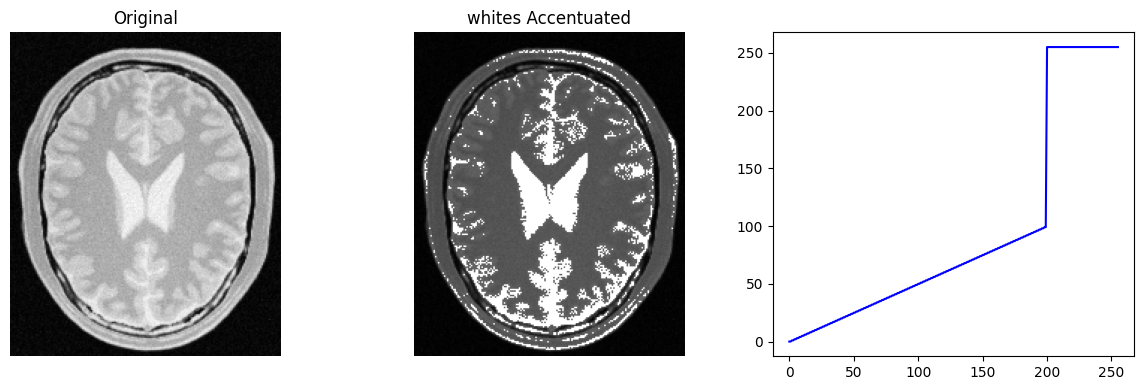

In [ ]:
img_transform = cv.LUT(img, transform_white)
plt.figure(figsize=(12,4))

# Display using matplotlib
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_transform, cmap='gray')
plt.title("Whites Accentuated")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(range(256), transform_white, color='blue')
plt.tight_layout()
plt.show()


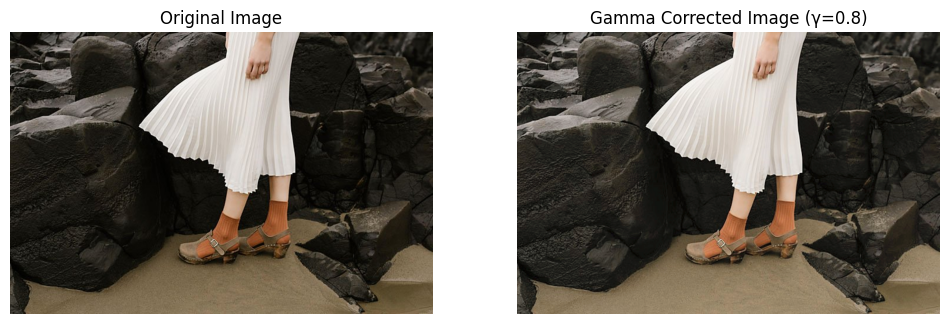

In [34]:


# Load image in BGR
img = cv.imread('a1images/highlights_and_shadows.jpg')  # Replace with your Fig. 31 file

# Convert BGR → LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Split channels
L, a, b = cv.split(lab)

# Normalize L to 0–1 range for gamma correction
L_normalized = L / 255.0

# Choose gamma value (example: 0.5 brightens the image)
gamma = 0.8
L_gamma_corrected = np.power(L_normalized, gamma)

# Rescale back to 0–255
L_corrected = np.uint8(L_gamma_corrected * 255)

# Merge corrected L with original a, b
lab_corrected = cv.merge((L_corrected, a, b))

# Convert back to BGR
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected Image (γ={gamma})")
plt.axis('off')

plt.show()


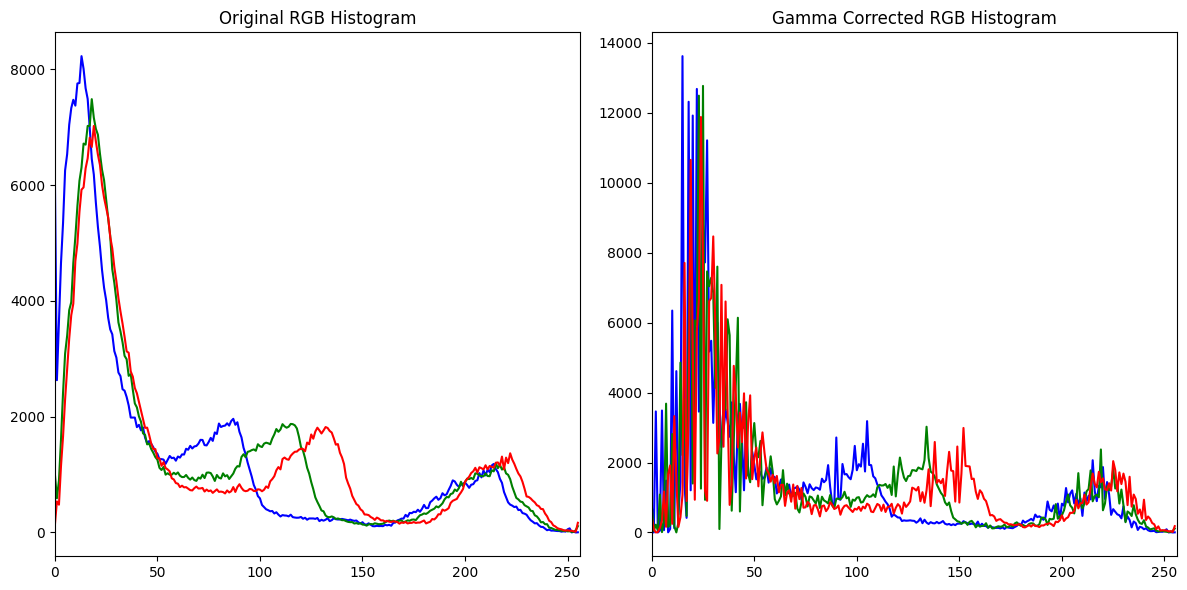

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Original RGB Histogram")

# Corrected full histogram
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    hist = cv.calcHist([img_corrected], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Gamma Corrected RGB Histogram")

plt.tight_layout()
plt.show()
plt.show()